# Importing the Libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Getting and loading the Training, Testing and Validation set

In [2]:
train_path = r"C:\AI-DocHelper_Models_Code\Breast_Cancer_Detection\dataset\train"
validation_path = r"C:\AI-DocHelper_Models_Code\Breast_Cancer_Detection\dataset\val"
test_path = r"C:\AI-DocHelper_Models_Code\Breast_Cancer_Detection\dataset\test"

In [3]:
batch_size = 16
img_size = (256, 256)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40.,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = img_size,
                                                   batch_size = batch_size,
                                                    color_mode = "grayscale",
                                                   class_mode = "categorical")

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                             target_size = img_size,
                                                             batch_size = batch_size,
                                                              color_mode = "grayscale",
                                                             class_mode = "categorical")

test_generator = validation_datagen.flow_from_directory(test_path,
                                                       target_size = img_size,
                                                       batch_size = batch_size,
                                                       color_mode = "grayscale",
                                                       class_mode = "categorical",
                                                       shuffle = False)

Found 1182 images belonging to 3 classes.
Found 393 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


# Getting the class names

In [6]:
temp_classes = dict(train_generator.class_indices)

classes = dict()
for (k, v) in temp_classes.items() :
    classes[v] = k
print(classes)

{0: 'benign', 1: 'malignant', 2: 'normal'}


# Building the CNN

## Initalising the CNN

In [7]:
model = Sequential()

# Adding the layers

## Adding the First Convolutional and Pooling layers

In [8]:
model.add(Conv2D(32, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Second Convolutional and Pooling layers

In [9]:
model.add(Conv2D(32, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Third Convolutional and Pooling layers

In [10]:
model.add(Conv2D(64, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Forth Convolutional and Pooling layers

In [11]:
model.add(Conv2D(64, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Fifth Convolutional and Pooling layers

In [12]:
model.add(Conv2D(128, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Adding the Sixth Convolutional and Pooling layers

In [13]:
model.add(Conv2D(128, (3, 3), input_shape = (img_size[0], img_size[1], 1), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening all the layers

In [14]:
model.add(Flatten())

## Adding the First Fully Connected Layer

In [15]:
model.add(Dense(units = 128, activation = "relu"))

## Adding the Second Fully Connected Layer

In [16]:
model.add(Dense(units = 64, activation = "relu"))

## Adding the Third Fully Connected Layer

In [17]:
model.add(Dense(units = 32, activation = "relu"))

## Adding the Final Fully Connected Layer

In [18]:
model.add(Dense(units = 3, activation = "sigmoid"))

## Displaying the model summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

## Compiling the CNN model

In [20]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy", 
             metrics = ["accuracy"])

# Training the CNN

## Saving the Best model only

In [21]:
checkpoint = ModelCheckpoint(filepath = "breast_cancer.h5",
                            save_best_only = True)

## Stopping the Training, if there is no improvement

In [22]:
earlyStopping = EarlyStopping(monitor="val_loss", 
                              patience = 10,
                             restore_best_weights = True,
                             verbose = 1)

## Calculating the steps_per_epoch and validation_steps

In [23]:
import math

batch_size = batch_size
training_size = 1182
validation_size = 393

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
validation_steps = compute_steps_per_epoch(validation_size)

print(steps_per_epoch)
print(validation_steps)

74
25


In [24]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = steps_per_epoch,
                             epochs = 50,
                             validation_data = validation_generator,
                             validation_steps = validation_steps,
                             callbacks = [checkpoint, earlyStopping])

C:\Users\RAJ SHAH\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
74/74 [==============================] - 44s 583ms/step - loss: 0.9475 - accuracy: 0.5663 - val_loss: 0.8376 - val_accuracy: 0.5598
Epoch 2/50
74/74 [==============================] - 40s 544ms/step - loss: 0.8538 - accuracy: 0.5991 - val_loss: 0.7629 - val_accuracy: 0.6463
Epoch 3/50
74/74 [==============================] - 42s 566ms/step - loss: 0.7596 - accuracy: 0.6517 - val_loss: 0.7239 - val_accuracy: 0.6667
Epoch 4/50
74/74 [==============================] - 42s 566ms/step - loss: 0.7288 - accuracy: 0.6721 - val_loss: 0.6950 - val_accuracy: 0.6718
Epoch 5/50
74/74 [==============================] - 42s 560ms/step - loss: 0.7194 - accuracy: 0.6627 - val_loss: 0.6769 - val_accuracy: 0.6845
Epoch 6/50
74/74 [==============================] - 41s 557ms/step - loss: 0.7106 - accuracy: 0.6816 - val_loss: 0.6575 - val_accuracy: 0.6794
Epoch 7/50
74/74 [==============================] - 42s 562ms/step - loss: 0.7303 - accuracy: 0.6440 - val_loss: 0.6471 - val_accuracy: 0.7099

# Saving the model

In [25]:
model_json = model.to_json()

with open("giloma_tumor.json", "w") as json_file :
    json_file.write(model_json)

# Visualizing the Training Performance

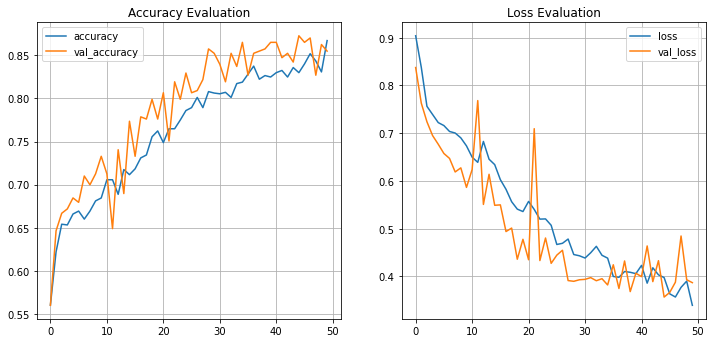

In [26]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.grid()
plt.legend()
plt.title("Loss Evaluation")

plt.savefig("giloma_tumor_model_history.jpg")

# Getting the accuracy for test set

In [27]:
test_accuracy = model.evaluate(validation_generator)
print(test_accuracy)

25/25 [==============================] - 4s 144ms/step - loss: 0.3867 - accuracy: 0.8550
[0.3867143988609314, 0.8549618124961853]


In [28]:
preds = model.predict(validation_generator, verbose=1)
preds

25/25 [==============================] - 5s 159ms/step


array([[9.9964166e-01, 9.9972999e-01, 3.7932716e-06],
       [3.4243655e-01, 7.2139800e-02, 9.7426504e-01],
       [8.4632814e-01, 6.9588751e-01, 1.6129953e-01],
       ...,
       [9.9997830e-01, 9.9808192e-01, 6.3436837e-06],
       [8.8271916e-01, 4.0384477e-01, 4.7918060e-01],
       [3.4243655e-01, 7.2139800e-02, 9.7426504e-01]], dtype=float32)

In [29]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(predictions)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
